# Introduction


The purpose of this notebook is to explore the original [Stanford cars dataset](https://ai.stanford.edu/~jkrause/cars/car_dataset.html). 



The original dataset provided by Stanford unfortunately provides labels for each image using an encoded matlab file type (.mat). Due to the difficult of parsing this file, an adapated version of this dataset was released on [Kaggle](https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder) that splits all the images into separate folders by class. For this exploration, we will be using this adapted dataset.

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Load Dataset

In [3]:
#Prepare ImageDataGenerators
gen_params = {"rescale":1.0/255}

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)      
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)


## Data generator for training images
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/car_data/car_data/train',
                                                    class_mode='categorical', batch_size = 32,
                                                    target_size=(224,224),color_mode='rgb',shuffle = True,subset='training')

## Data generator for test images
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle/car_data/car_data/test',
                                                    class_mode='categorical', batch_size = 32,
                                                    target_size=(224,224),color_mode='rgb',shuffle = True)

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


# 2. Dataset Exploration

In [4]:
list_data = [train_generator.samples,
             test_generator.samples,
             train_generator.samples+test_generator.samples,
             train_generator.image_shape,
             len(np.unique(train_generator.classes))]

df = pd.DataFrame([list_data],
                  columns=['Number of training images','Number of testing images','Total number of images','Size of each image','Number of Classes'],
                  index=['Value']).transpose()

display(df)

,Value
Number of training images,8144
Number of testing images,8041
Total number of images,16185
Size of each image,"(224, 224, 3)"
Number of Classes,196


## 2.1. Class Distribution

In this section, we explore the class distribution of the dataset. In general we see that the range of samples per class is 48 to 136 images, with an average of 83. We can see from the plot of the first 50 classes (196 was quite too many to plot), that we generally do not have a large class imbalance. 

In [5]:
from collections import Counter
train = Counter(train_generator.classes)
test = Counter(test_generator.classes)
total = dict(train+test)
class_names = dict(train_generator.class_indices)
class_names = {v: k for k, v in class_names.items()}

In [6]:
class_df = pd.DataFrame([class_names,total]).transpose()
class_df.columns=['Make','Num Images']
class_df

,Make,Num Images
0,AM General Hummer SUV 2000,89
1,Acura Integra Type R 2001,89
2,Acura RL Sedan 2012,64
3,Acura TL Sedan 2012,86
4,Acura TL Type-S 2008,84
...,...,...
191,Volkswagen Golf Hatchback 2012,86
192,Volvo 240 Sedan 1993,91
193,Volvo C30 Hatchback 2012,83
194,Volvo XC90 SUV 2007,86


In [7]:
print("Average number of images per class: ",class_df['Num Images'].mean())
print("Maximum number of images per class: ",class_df['Num Images'].max())
print("Minimum number of images per class: ",class_df['Num Images'].min())

Average number of images per class:  82.5765306122449
Maximum number of images per class:  136
Minimum number of images per class:  48


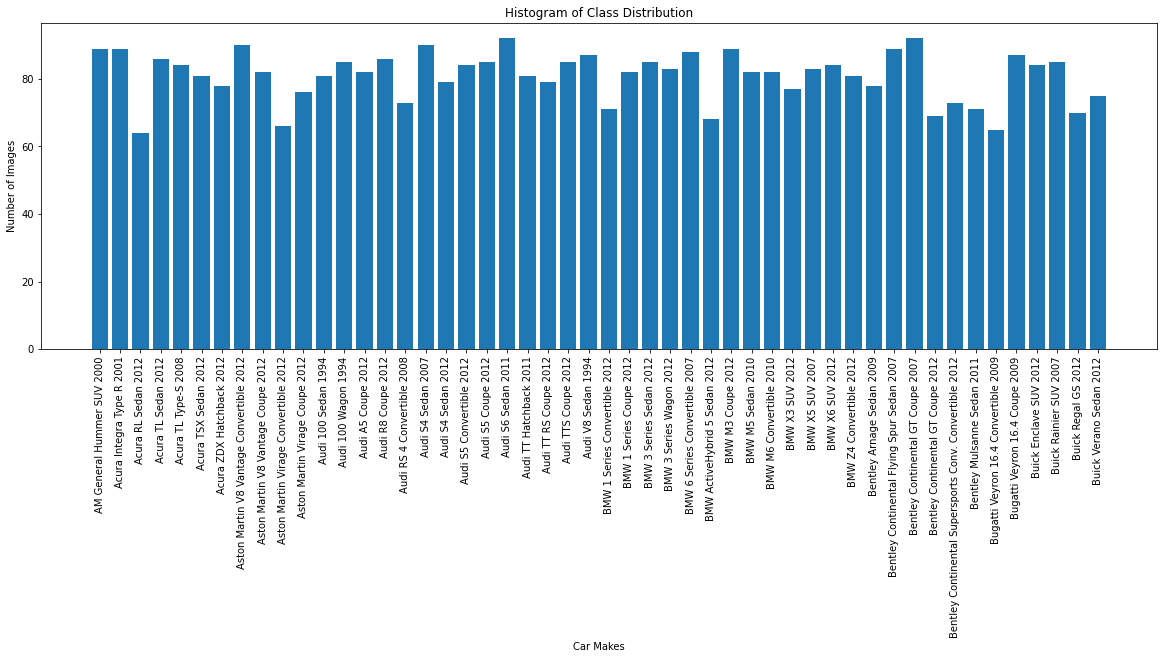

In [8]:
#Visualize distribution of each first 50 classes
fig = plt.figure()
fig.set_size_inches(20,6)
plt.bar(class_df['Make'].head(50),class_df['Num Images'].head(50))
plt.xticks(rotation=90)
plt.xlabel("Car Makes")
plt.ylabel("Number of Images")
plt.title("Histogram of Class Distribution")
plt.show()

# 3. Data Visualization

Each image in the Stanford cars dataset comes with a bounding box that isolates the vehicle to remove background noise. In this section, we will visualize the vehicles with their bounding boxes. 

We randomly selected 5 images to plot.

In [9]:
img1 = "/content/drive/MyDrive/Kaggle/car_data/car_data/train/AM General Hummer SUV 2000/00163.jpg"
img2 = "/content/drive/MyDrive/Kaggle/car_data/car_data/train/BMW ActiveHybrid 5 Sedan 2012/00238.jpg"
img3 = "/content/drive/MyDrive/Kaggle/car_data/car_data/train/Buick Enclave SUV 2012/00177.jpg"
img4 = "/content/drive/MyDrive/Kaggle/car_data/car_data/train/Daewoo Nubira Wagon 2002/00558.jpg"
img5 = "/content/drive/MyDrive/Kaggle/car_data/car_data/train/Hyundai Sonata Hybrid Sedan 2012/00004.jpg"

images = [img1,img2,img3,img4,img5]

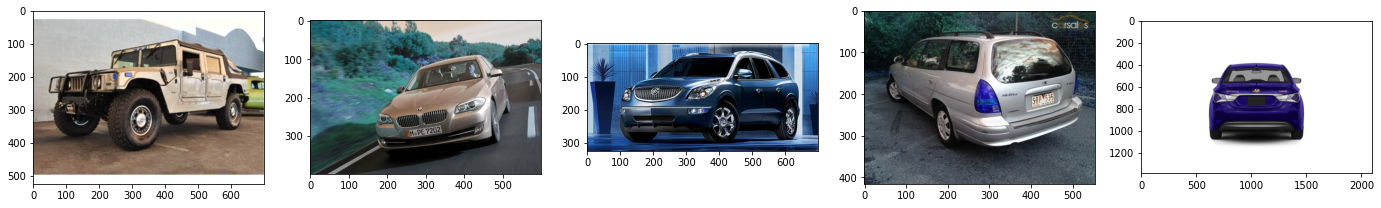

In [10]:
# Displaying some images from training set
plt.figure(figsize = (24,18))
for ii in range(5):
    plt.subplot(1,5,ii+1)
    img = cv2.imread(images[ii])
    plt.imshow(img, cmap = "gray")
plt.show()

In [11]:
# Load csv with bounding box information
anno_train = pd.read_csv("/content/drive/MyDrive/Kaggle/anno_train.csv",header=None)

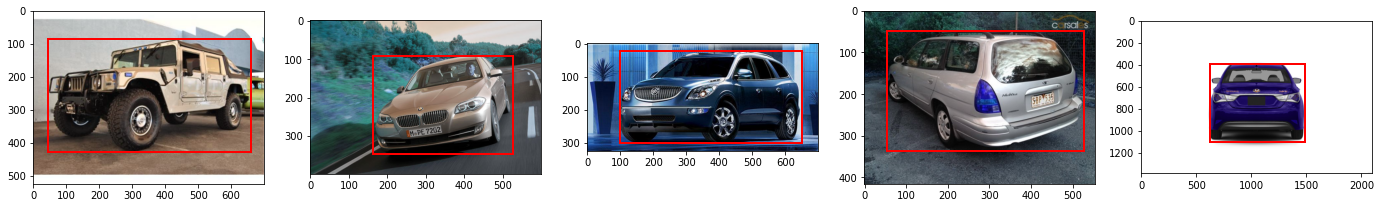

In [12]:
import matplotlib.patches as patches
indexes = [162,237,176,557,3]

fig, ax = plt.subplots(1,5, figsize=(24,18))

for ii in range(5):
    img = cv2.imread(images[ii])
    ax[ii].imshow(img, cmap = "gray")

    # Create a Rectangle patch
    xy = anno_train.iloc[indexes[ii]][1], anno_train.iloc[indexes[ii]][2]
    width = anno_train.iloc[indexes[ii]][3]-anno_train.iloc[indexes[ii]][1]
    height = anno_train.iloc[indexes[ii]][4]-anno_train.iloc[indexes[ii]][2]
    rect = patches.Rectangle(xy, width, height, fill=False, color='r', linewidth=2)
    ax[ii].add_patch(rect)
    
plt.show()